In [10]:
# Step 1: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 2: Load and Prepare the Breast Dataset
columns = [
    'ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
    'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
    'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
    'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
    'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
    'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
    'symmetry3', 'fractal_dimension3'
]


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, names=columns)
print(df.head())
# Map target classes to numerical values
df['Diagnosis'] = df['Diagnosis'].astype('category').cat.codes

# Split data into features and labels
X = df.iloc[:, :-1].values
y = df['Diagnosis'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

In [11]:
# Step 3: Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.8626
Epoch 2/20, Loss: 0.6128
Epoch 3/20, Loss: 0.3112
Epoch 4/20, Loss: 0.0868
Epoch 5/20, Loss: 0.0374
Epoch 6/20, Loss: 0.0244
Epoch 7/20, Loss: 0.0154
Epoch 8/20, Loss: 0.0106
Epoch 9/20, Loss: 0.0068
Epoch 10/20, Loss: 0.0043
Epoch 11/20, Loss: 0.0030
Epoch 12/20, Loss: 0.0022
Epoch 13/20, Loss: 0.0016
Epoch 14/20, Loss: 0.0013
Epoch 15/20, Loss: 0.0010
Epoch 16/20, Loss: 0.0011
Epoch 17/20, Loss: 0.0007
Epoch 18/20, Loss: 0.0006
Epoch 19/20, Loss: 0.0005
Epoch 20/20, Loss: 0.0004


In [12]:
# Step 5: Validate the Model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


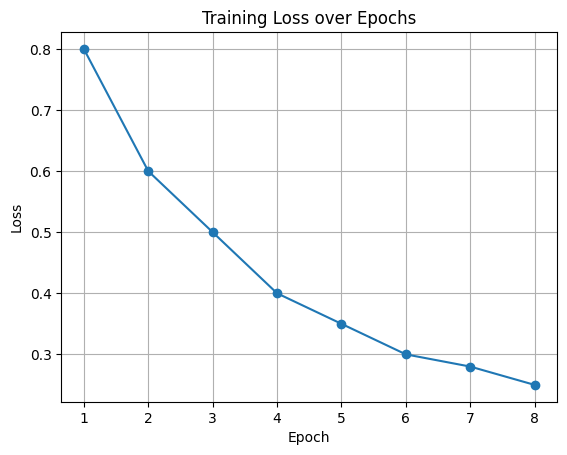

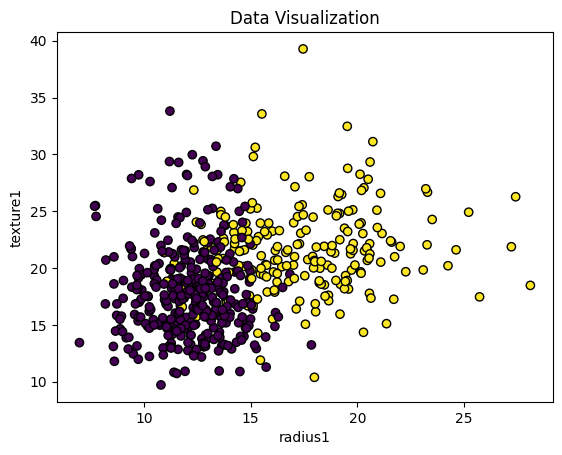

In [13]:
# Step 6: Visualize Training Loss and Data Distribution
# Plotting training loss (example values, replace with real loss values if collected)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Visualize data distribution
plt.scatter(X[:, 2], X[:, 3], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('radius1')
plt.ylabel('texture1')
plt.title('Data Visualization')
plt.show()